In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

font = {'family': 'normal',
        'size': 16}
matplotlib.rc('font', **font)
matplotlib.rcParams['axes.linewidth'] = 0.2
matplotlib.rcParams['xtick.major.width'] = 0.2
matplotlib.rcParams['ytick.major.width'] = 0.2

In [37]:
num = 10
# the data to visualize
data = [np.random.rand(5,num), np.random.rand(5,num)]

colors = [['red'] * num, ['cyan']*num]

group_width = 5
box_width = 1.5

positions_1 = [i for i in range(1,group_width*data[0].shape[1]+1,group_width)]
positions_2 = [i + box_width + 0.2 for i in positions_1]

positions = [positions_1, positions_2]
labels = ["Male","Female"]

/home/wxk/anaconda2/envs/py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


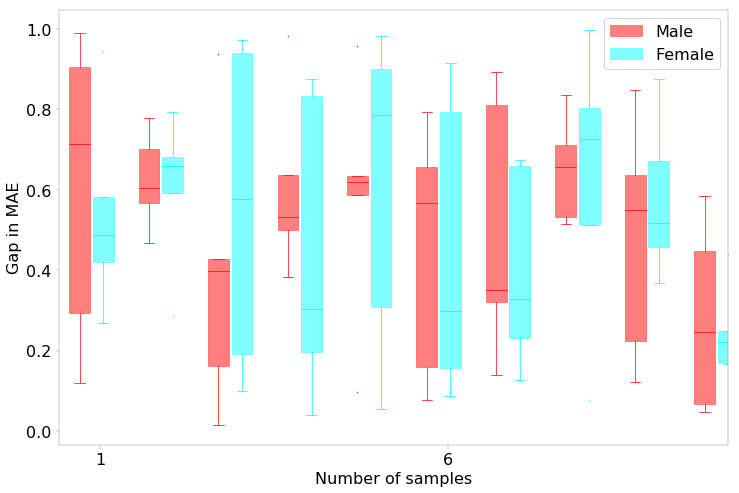

In [41]:



xtick_positions = [i+box_width for i in positions_1[::group_width]]
xticks = [1+i//group_width for i in positions_1[::group_width]]


linewidth = 0.7
marksize = 0.5


fig, ax = plt.subplots(figsize=(12,8))
bps = []

for i in range(2):
    bp = plt.boxplot(data[i],positions= positions[i],widths = box_width,patch_artist=True)
    bps.append(bp)

    # customize the box plot color except the box width
    # color each box
    for patch, color in zip(bp['boxes'], colors[i]):
        patch.set_facecolor(color)

        # set the box color half-transparent, so the meadian bar is visible even if it is the same color
        patch.set_alpha(0.5)

    for element in ['boxes','whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color= colors[i][0],linewidth = linewidth)
    plt.setp(bp["fliers"], markeredgecolor= colors[i][0],markersize=marksize)
    
ax.legend([bps[0]["boxes"][0], bps[1]["boxes"][0]], labels, loc='upper right')

# plot the labels
plt.xlabel('Number of samples')
plt.ylabel('Gap in MAE')
#plot the xticks
plt.xticks(xtick_positions, xticks)

# set the range of the figure
plt.xlim(xtick_positions[0]-3, positions[1][-1])

plt.show()